# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import gmtime, strftime
from scipy.stats import linregress
import seaborn as sns
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#!pip install citipy

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = url + "appid=" + weather_api_key + "&units="+ units + "&q="
count=0
subset=1

for city in cities:
    # Build query URL based on current element in cities
    city_url = query_url + city
  
    # Get weather data
    response = requests.get(city_url).json()
               
    #pulls specific information form json
    try:
        cit_name = response["name"]
        count= count+1
        if count > 50:
                subset=subset+1
                count= 1
            
        print(f"Processing Record {count} of Set {subset} | {cit_name}")
    except:
        #print(f'City not found, skipping')


SyntaxError: unexpected EOF while parsing (<ipython-input-38-b28ae6651b51>, line 24)

In [37]:
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError as e:
            #print(f'No data found {city}')

SyntaxError: unexpected EOF while parsing (<ipython-input-37-57bbff441589>, line 25)

In [17]:
#creates dictionary for dataframe
cities_dict={ "City":city_name,
              "Lat" :lat,
              "Lng":lng,
              "Max Temp":max_temp,
               "Humidity":humidity,
              "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
                "Country":country,
                "Date":date }       

    
cities_df=pd.DataFrame(cities_dict)

#saves dataframe to csv
cities_df.to_csv('output_data/output.csv', index=False, header=True)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,76.62,81,100,5.88,BR,1613334721
1,Hermanus,-34.4187,19.2345,63.00,93,80,1.01,ZA,1613334722
2,Puerto Ayora,-0.7393,-90.3518,81.00,74,90,9.22,EC,1613334669
3,Geraldton,-28.7667,114.6000,69.80,83,14,4.43,AU,1613334653
4,Rikitea,-23.1203,-134.9692,80.13,76,52,16.11,PF,1613334722


In [18]:
cities_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.438530,12.429438,50.936866,72.686620,55.665493,8.244278,1.613335e+09
std,33.080133,88.995784,32.131996,20.574904,40.649368,5.948523,6.730588e+01
min,-54.800000,-175.200000,-35.820000,1.000000,0.000000,0.090000,1.613334e+09
25%,-7.008725,-67.446975,30.200000,63.000000,7.000000,3.440000,1.613335e+09
50%,21.487600,16.036700,63.995000,78.000000,75.000000,6.910000,1.613335e+09
75%,47.741675,89.244200,77.000000,88.000000,95.000000,11.500000,1.613335e+09
max,78.218600,178.416700,96.150000,100.000000,100.000000,36.820000,1.613335e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

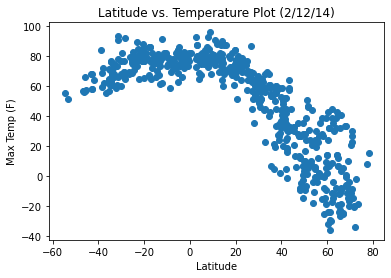

In [33]:
# creation of scatter plot
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Latitude vs. Temperature Plot (2/12/14)')
plt.savefig("output_data/LatvsTemp.png")
plt.show()

In [ ]:
This code allows for the visiualization of the vairable Max Temperature and the relationship of the second variable Latitude.
The scatter shows that Max Temperatures have close relation to 0 degrees Latitude. 

## Latitude vs. Humidity Plot

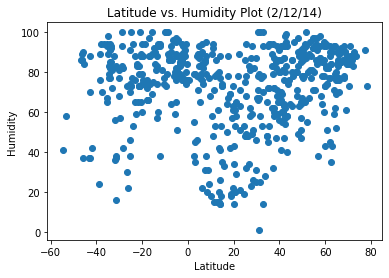

In [34]:
# creation of scatter plot
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot (2/12/14)')
plt.savefig("output_data/LatvsHum.png")
plt.show()

In [ ]:
This code allows for the visiualization of the vairable Humidity and the relationship of the second variable Latitude.
The scatter plot shows that Humidity maybe consistently higher close to 0 degrees Latitude. 

## Latitude vs. Cloudiness Plot

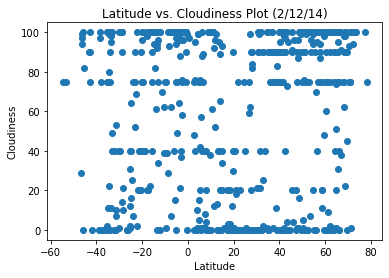

In [35]:
# creation of scatter plot
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot (2/12/14)')
plt.savefig("output_data/LatvsCloud.png")
plt.show()

In [ ]:
This code allows for the visiualization of the vairable Cloudiness and the relationship of the second variable Latitude.
The scatter plot shows that Cloudiness has no relation to Latitude. 

## Latitude vs. Wind Speed Plot

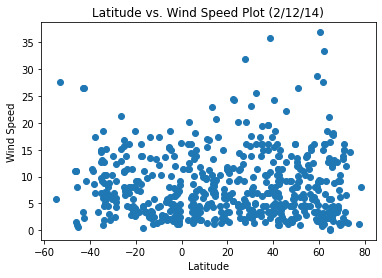

In [36]:
# creation of scatter plot
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,6])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot (2/12/14)')
plt.savefig("output_data/LatvsWS.png")
plt.show()

In [ ]:
This code allows for the visiualization of the vairable Wind Speed and the relationship of the second variable Latitude.
The scatter plot shows that lower Wind Speeds are related to the proximity of 0 degrees Latitude. 

## Linear Regression

In [20]:
# Code shows how the Northern Hemisphere was defined
N_Hemis_df=cities_df.loc[cities_df['Lat']>0]
N_Hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Mayo,38.8876,-76.5119,35.01,93,90,3.44,US,1613334722
7,Jamestown,42.0970,-79.2353,24.01,63,1,6.91,US,1613334455
8,Severo-Kuril'sk,50.6789,156.1250,23.95,92,76,10.16,RU,1613334723
9,Barrow,71.2906,-156.7887,-14.80,84,1,3.44,US,1613334723
11,Aklavik,68.2191,-135.0107,-0.40,78,90,9.22,CA,1613334724


In [21]:
# Code shows how the Southern Hemisphere was defined
S_Hemis_df=cities_df.loc[cities_df['Lat']<0]
S_Hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,76.62,81,100,5.88,BR,1613334721
1,Hermanus,-34.4187,19.2345,63.00,93,80,1.01,ZA,1613334722
2,Puerto Ayora,-0.7393,-90.3518,81.00,74,90,9.22,EC,1613334669
3,Geraldton,-28.7667,114.6000,69.80,83,14,4.43,AU,1613334653
4,Rikitea,-23.1203,-134.9692,80.13,76,52,16.11,PF,1613334722


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

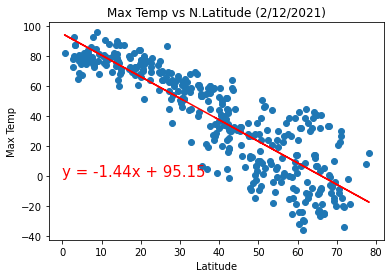

The r-squared is: 0.7654954766755738


In [26]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Max Temp vs N.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Max Temp",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.savefig("output_data/Nth_MTvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a negative correlation between Max Temp and Latitude, 
meaning max temperatures are less likely associated latitudes north of 0 degrees. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

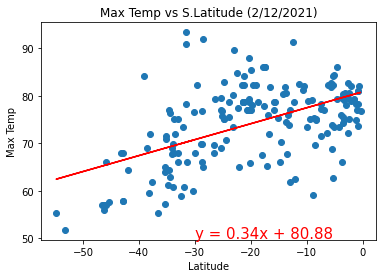

The r-squared is: 0.2870254230711749


In [25]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Max Temp vs S.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Max Temp",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.savefig("output_data/Sth_MTvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a positive correlation between Max Temp and Latitude in the Southern Hemisphere, 
meaning higher temperatures associated with latitudes south of 0 degrees.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

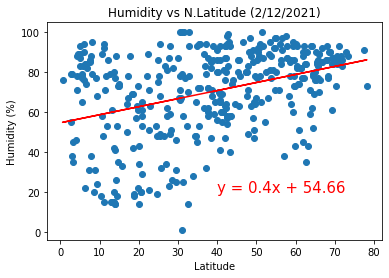

The r-squared is: 0.1423600136459112


In [27]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Humidity vs N.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Humidity (%)",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.savefig("output_data/Nth_HumvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a positive correlation between Humidity and Latitude in the Northern Hemisphere, 
meaning high humidity is associated with latitudes north of 0 degrees.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

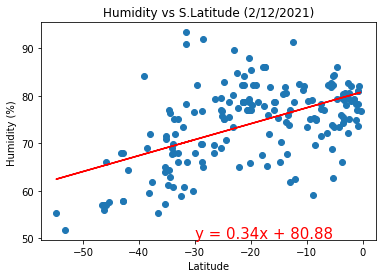

The r-squared is: 0.2870254230711749


In [28]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Humidity vs S.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Humidity (%) ",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.savefig("output_data/Sth_HumvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a positive correlation between Humidity and Latitude in the Southern Hemisphere, 
meaning high humidity is more strongly associated with latitudes south of 0 degrees.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

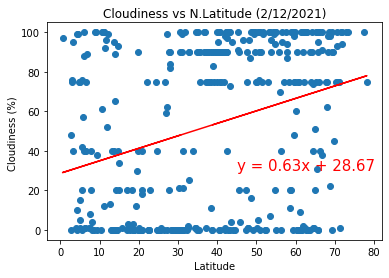

The r-squared is: 0.09371694072885585


In [29]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Cloudiness vs N.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Cloudiness (%) ",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.savefig("output_data/Nth_CldvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a positive correlation between Cloudiness and Latitude in the Northern Hemisphere, 
this r-squared is weak at .06 indicating more analyzation is needed. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

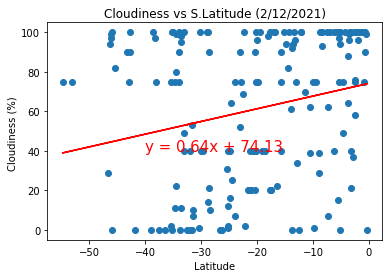

The r-squared is: 0.05227066103565758


In [30]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Cloudiness vs S.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Cloudiness (%) ",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.savefig("output_data/Sth_CldvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a positive correlation between Cloudiness and Latitude in the Southern Hemisphere, 
this r-squared is weak at .02 indicating more analyzation is needed. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

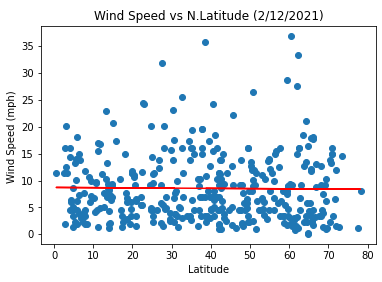

The r-squared is: 0.00019429803244159192


In [31]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Wind Speed vs N.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Wind Speed (mph) ",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.savefig("output_data/Nth_CldvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a positive correlation between Wind Speed and Latitude in the Northern Hemisphere, 
this r-squared is weak at .008 indicating more analyzation is needed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

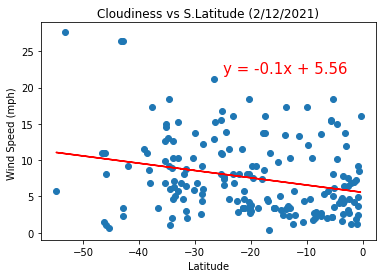

The r-squared is: 0.06462844629951682


In [32]:
# Code displays the scatter plot, linear regression, and line equation
plt.title("Cloudiness vs S.Latitude (2/12/2021)")
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Wind Speed (mph) ",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-25,22),fontsize=15,color="red")
plt.savefig("output_data/Sth_CldvsLat_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
The line regression for this scatter plot shows a negative correlation between Wind Speed and Latitude in the Southern Hemisphere, 
this r-squared is weak at .002 indicating more analyzation is needed. 

In [76]:
#Seaborn code easier
        
#sns.regplot(x="Lat", y='Wind Speed', data=S_Hemis_df,line_kws={'color': 'red'},x_jitter=.1,y_jitter=.1, 
#ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")

               
#print(f"The r-squared is: {rvalue**2}")